<a href="https://colab.research.google.com/github/GodwinEbikwo/Web_scrapping_AA/blob/main/Web_Scraping_the_AA_website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web scrapping 1000 car data from the AA

I collected data about various cars listed on the AA's website through web scraping. The data includes make, model, year, mileage, price, location of the cars etc. This information will be used for market research and analysis of consumer trends. 

### Tools used
*  **pandas** is a powerful data manipulation library that allows you to easily manipulate and analyze large datasets. 

*   **time** is a built-in Python module that provides various time-related functions, such as timing the execution of code. 

*   **numpy** is another popular data manipulation library that provides high-level mathematical functions to work with arrays and matrices.

*  **matplotlib** is a data visualization library that allows you to create various types of charts and plots to visualize your data.

*  **requests** is a Python module that allows you to make HTTP requests to websites, which is useful for web scraping. 

*  **BeautifulSoup** is a Python library for parsing HTML and XML documents, which is commonly used in web scraping. Finally, csv is a built-in Python module for reading and writing CSV files.

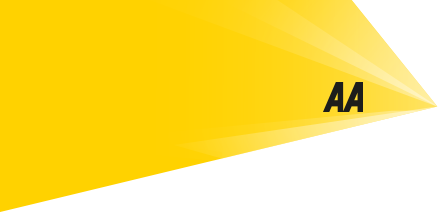




In [ ]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from csv import writer
from google.colab import files

headers = {'User-agent': 'your bot 0.1'}
base_url = 'https://www.theaa.com'
search_url = 'https://www.theaa.com/used-cars/displaycars?fullpostcode=mk18%201sf&travel=2000&page='
page_count = 1

car_links = []
distances = []

# Loop through all pages and get car links and distances
for page_count in range(1, 101):
    url = search_url + str(page_count)
    page = requests.get(url, headers=headers).text
    soup = BeautifulSoup(page, 'html.parser')

    # find class name 'vl-item clearfix'
    links = soup.find_all('div', class_='vl-item clearfix')
    dis_lists = soup.find_all('div', class_='vl-location')

    # find car links
    for link in links:
        car_link = link.find('a', class_='image-link').get('href')
        car_links.append(base_url + car_link)

    # find all locations for each car
    for distance in dis_lists:
        car_dist = distance.find('strong', class_='strong-inline').get_text()
        distances.append(car_dist)

    time.sleep(1)


#set the variable names
header = [
    'sales_title', 'price', 'mileage', 'year', 'fuel_type', 'transmission',
    'body_type', 'colour', 'doors', 'engine_size', 'co2_Emissions',
    'no_of_reviews', 'rating_value', 'distance'
]

rows = []

with open('AA_carData.csv', 'w', encoding='utf8', newline='') as file:
    thewriter = writer(file)
    thewriter.writerow(header)

    for car_link, distance in zip(car_links, distances):
        time.sleep(1)
        response = requests.get(car_link, headers=headers).text
        content = BeautifulSoup(response, 'html.parser')

        try:
            car_make = content.find('span', class_='make').get_text()
        except:
            car_make = 'NaN'

        try:
            car_model = content.find('span', class_='model').get_text()
        except:
            car_model = 'NaN'

        try:
            car_title = content.find(
                'span', class_='variant new-transport--regular').get_text()
        except:
            car_title = 'NaN'

        try:
            price = content.find('strong', class_='total-price').get_text()
        except:
            price = 'NaN'

        try:
            no_of_reviews = [
                item['content']
                for item in content.find_all('div', attrs={'content': True})
            ][1]
        except:
            no_of_reviews = 'NaN'

        try:
            rating_value = [
                item['content']
                for item in content.find_all('div', attrs={'content': True})
            ][3]
        except:
            rating_value = 'NaN'

        try:
            data = content.find_all('span', class_='vd-spec-value')
            mileage = data[0].get_text()
            year = data[1].get_text()
            fuel_type = data[2].get_text()
            transmission = data[3].get_text()
            body_type = data[4].get_text()
            colour = data[5].get_text()
            doors = data[6].get_text()
            engine_size = data[7].get_text()
            co2_Emissions = data[8].get_text()
        except:
            mileage = 'NaN'
            year = 'NaN'
            fuel_type = 'NaN'
            transmission = 'NaN'
            body_type = 'NaN'
            colour = 'NaN'
            doors = 'NaN'
            engine_size = 'NaN'
            co2_Emissions = 'NaN'

        dist = distance
        title = f"{car_make} {car_model} {car_title}"

        content = [
            title, price, mileage, year, fuel_type, transmission, body_type, colour,
            doors, engine_size, co2_Emissions, no_of_reviews, rating_value, dist
        ]

        thewriter.writerow(content)
        rows.append(content)

df = pd.DataFrame(rows, columns=header)
files.download('AA_carData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AA_carData.csv to AA_carData.csv


                                 sales_title    price mileage    year  \
0                  Ford Ka+ 1.2 85 Zetec 5dr   £7,995  43,221  2017.0   
1                  Ford Ka+ 1.2 85 Zetec 5dr   £9,995  15,000  2018.0   
2  Ford Fiesta 1.0 EcoBoost 125 Titanium 5dr  £12,995  35,000  2019.0   
3      Ford Fiesta 1.0 EcoBoost 95 Trend 3dr  £12,995  22,000  2020.0   
4                Kia Ceed 1.0T GDi ISG 2 5dr  £13,995  27,000  2019.0   

  fuel_type transmission  body_type  colour  doors engine_size co2_Emissions  \
0    Petrol       Manual  Hatchback    Grey    5.0       1.2 L      114 g/km   
1    Petrol       Manual  Hatchback  Silver    5.0       1.2 L      114 g/km   
2    Petrol       Manual  Hatchback    Grey    5.0       1.0 L      110 g/km   
3    Petrol       Manual  Hatchback    Blue    3.0       1.0 L       94 g/km   
4    Petrol       Manual  Hatchback   Black    5.0       1.0 L      122 g/km   

   no_of_reviews  rating_value   distance  
0           89.0           4.0  500 

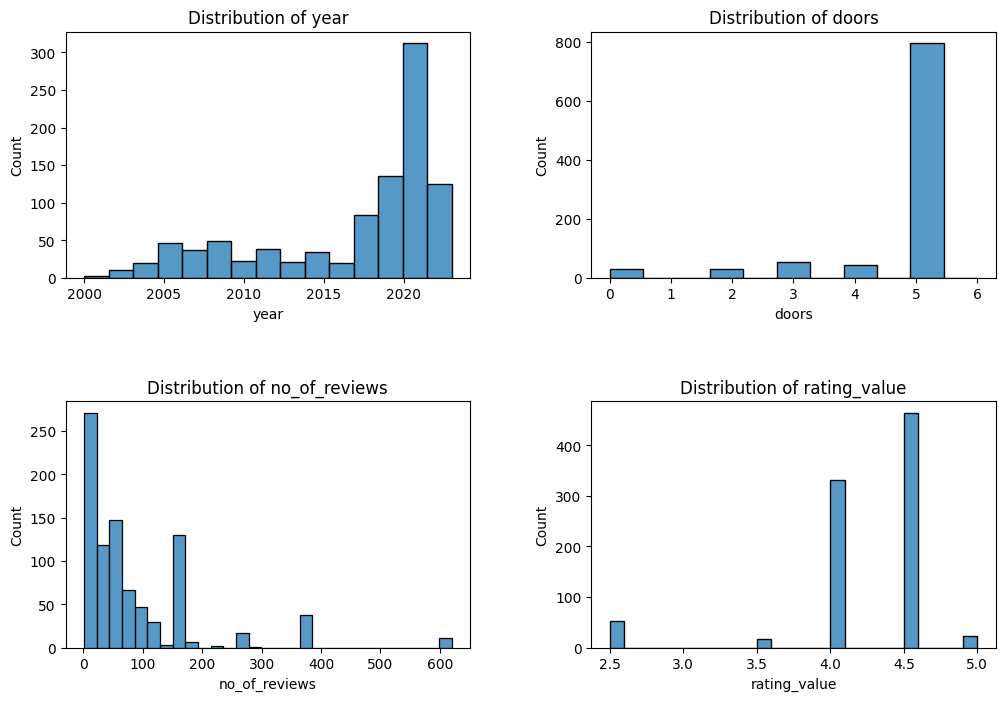

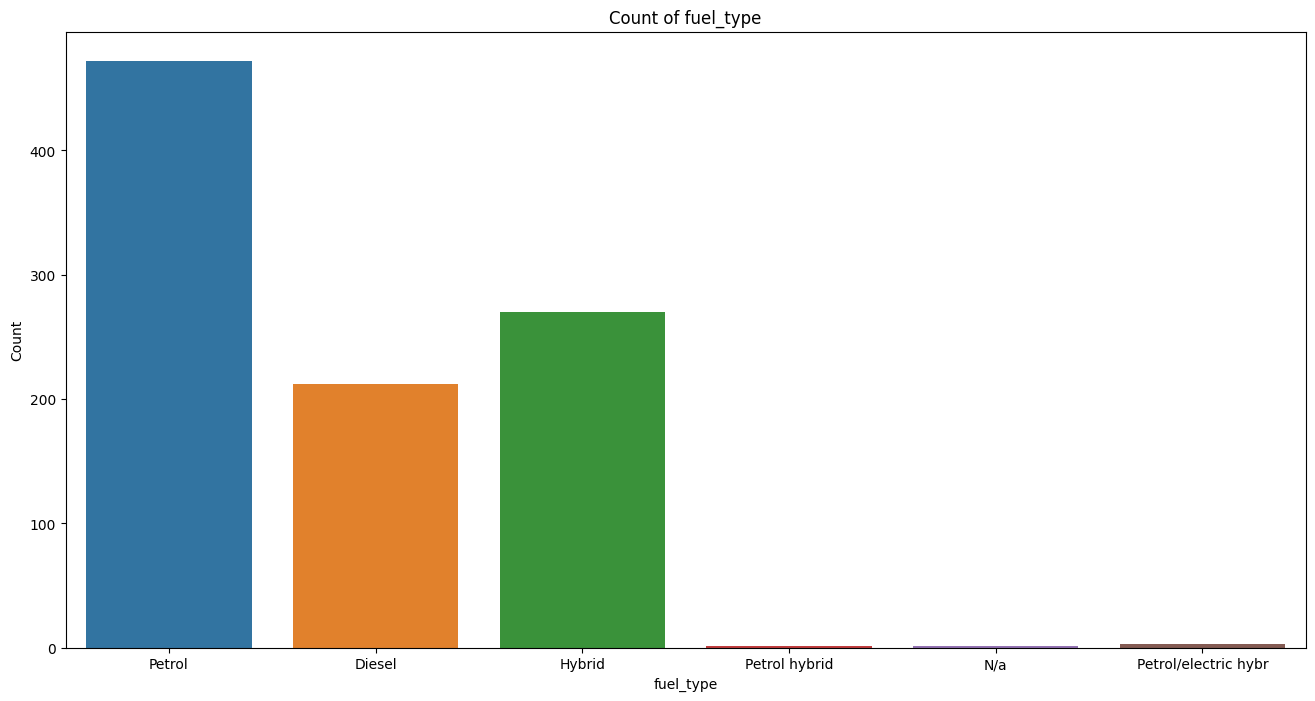

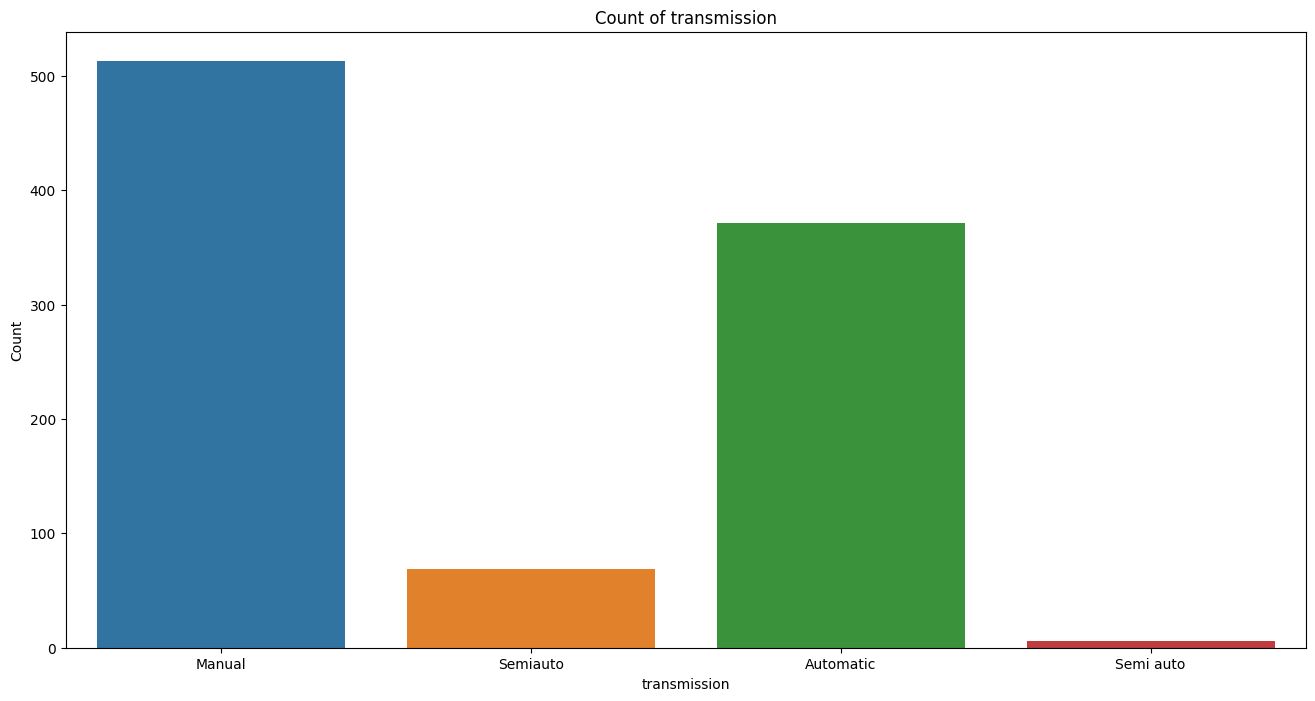

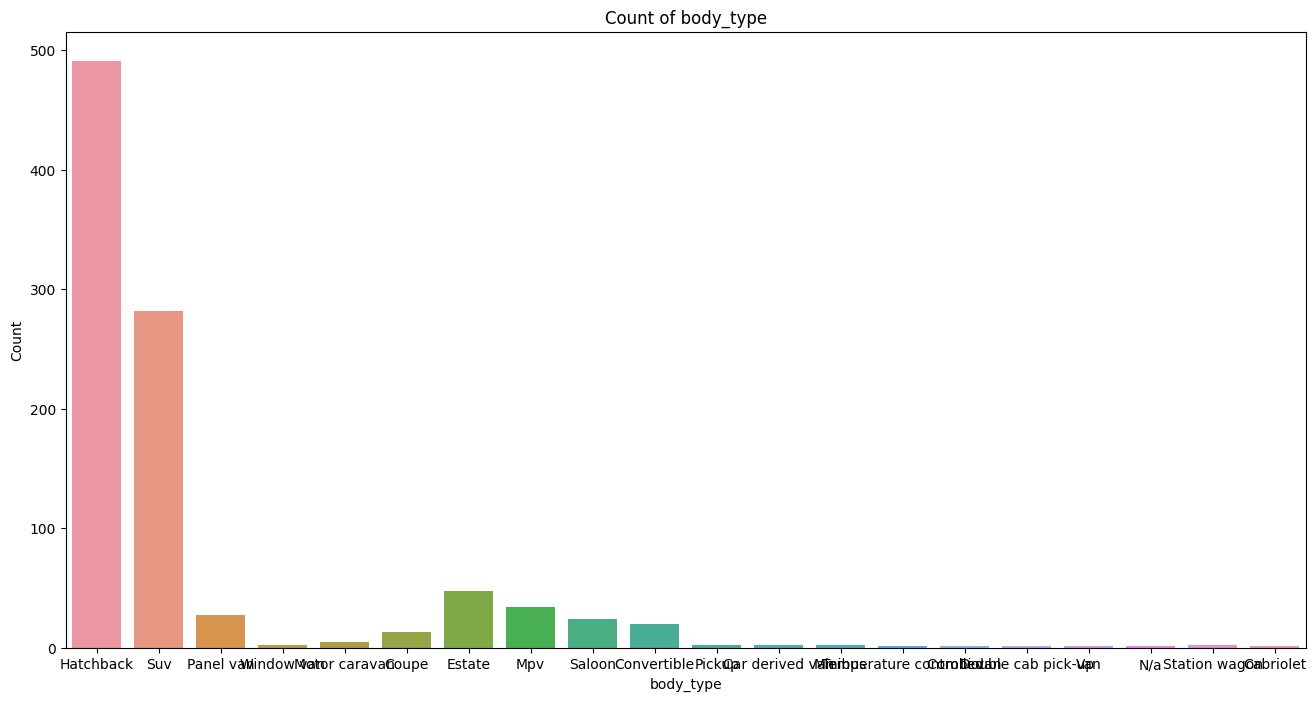

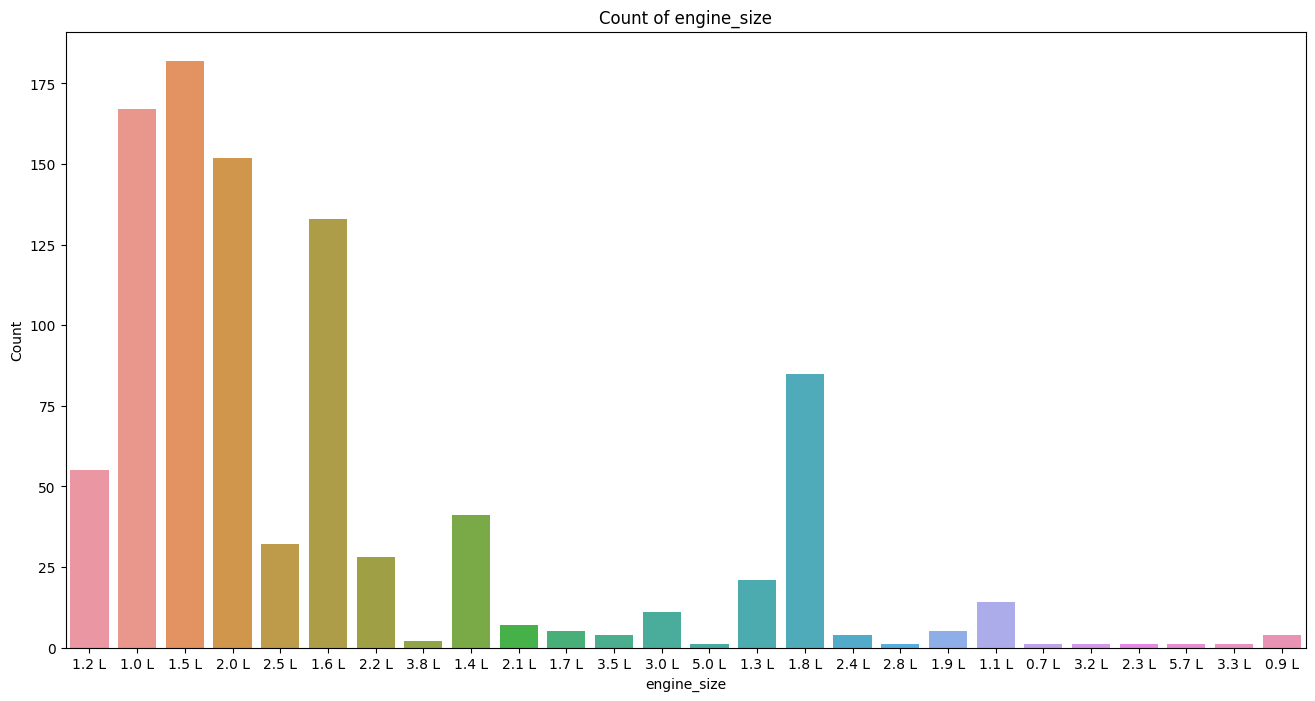

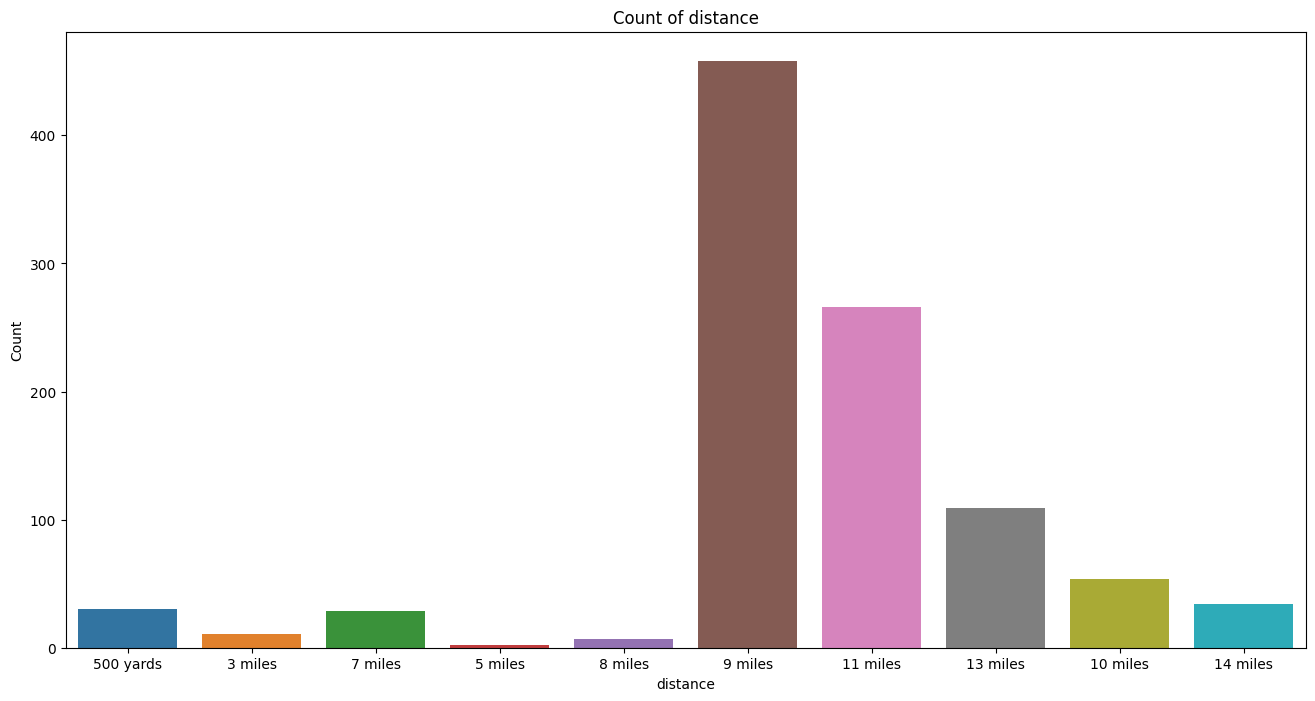

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('AA_carData.csv')

def eda(df):
  print(df.head(5))
  print('\n')
  print('The data set has', df.shape[0], 'rows and', df.shape[1], 'columns\n')
  print("Summary statistics:\n")
  print(df.describe())
  print('\n')
  print(df.dtypes)
  print('Variables with missing data\n')
  print(df.isnull().sum())
  print('Checking for duplicates')
  print(df.duplicated().sum())


  num_cols = df.select_dtypes(include=['float', 'int']).columns
  cat_cols = df.select_dtypes(include=['object']).columns
  cat_cols = cat_cols.drop(['sales_title', 'colour', 'co2_Emissions', 'mileage', 'price'])
  
  num_cols_len = len(num_cols)
  num_cols_per_row = 2
  num_rows = num_cols_len // num_cols_per_row 

  fig, axs = plt.subplots(num_rows, num_cols_per_row, figsize=(12, 4*num_rows))
  fig.subplots_adjust(hspace=0.5, wspace=0.3)
  axs = axs.ravel()
  for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=False, ax=axs[i])
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Count")
  plt.show()

  # Plot categorical variables
  for col in cat_cols:
    plt.figure(figsize=(16,8))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

eda(df)

# EDA Summary

The dataset contains information on 1000 cars, and has 14 columns. The average car year in the dataset is 2016, with a standard deviation of 5.6 years. The earliest car in the dataset was manufactured in the year 2000, while the most recent one was manufactured in 2023. The dataset shows that on average, cars in the dataset have 4 doors.

Several columns in the dataset have missing values. Specifically, the "mileage" and "distance" columns have 41 missing values, while the remaining columns have 112 missing values. Data with missing values should be treated carefully, and any analysis on this data must take into account the effects of missing data.

The dataset also contains 3 duplicates, which should be removed to ensure the integrity of the data.

Overall, the EDA summary highlights some key aspects of the dataset, including the car year and the number of doors. The summary also identifies missing data and duplicates, which must be addressed before any further analysis of the data.

# Handling Missing data

Handling missing data in a DataFrame is an important step in data cleaning and preparation. Depending on the extent of missing data, There are several ways in which one can handle missing data in a dataframe:

* **Removing missing data**: If the number of missing data points is relatively small compared to the size of the dataset, removing the rows or columns with missing data can be an option. However, this approach should be used with caution as it can result in loss of information.

* **Imputing missing data**: Another option is to impute the missing data with some value. This can be done by replacing missing values with the mean, median, or mode of the variable, or by using a more advanced imputation method such as regression imputation or k-nearest neighbors imputation.

* **Ignore missing data**: Depending on the analysis, the data scientist may choose to ignore the missing data and focus only on the available data. This approach can be used if the missing data is relatively small and does not significantly affect the analysis.




In [4]:
#Check for missing data in the dataframe
print(df.isnull().sum())

sales_title        0
price              0
mileage           41
year              41
fuel_type         41
transmission      41
body_type         41
colour            41
doors             41
engine_size       41
co2_Emissions     41
no_of_reviews    112
rating_value     112
distance           0
dtype: int64


We fill missing values in a dataset with median and mode values for several reasons. First, missing values can cause errors in statistical analysis and machine learning models. Second, we want to maintain the integrity of the data by not removing too much data as it may lead to biased results. Third, replacing missing values with median and mode values allows us to maintain the central tendency and distribution of the data.

The median value is the middle value in a dataset, and it is resistant to extreme values. Thus, it is a good measure to use for skewed data or outliers. The mode value is the most frequent value in a dataset, and it is useful for categorical or discrete data.

In summary, filling missing values with median and mode values helps us to preserve the data, avoid errors, and maintain the statistical properties of the data.

In [5]:
# replace NaN values in the "mileage" column with the median value of that column
df['mileage'] = df['mileage'].str.replace(',', '').astype(float)
median_mileage = df['mileage'].median()
df['mileage'].fillna(median_mileage, inplace=True)

#replace NaN values in the rating_value with the mean of that column
median_ratingValue = df['rating_value'].mean()
df['rating_value'].fillna(median_ratingValue, inplace = True)

## Replace missing values with the mean or most frequent value of each variable
df['year'] = df['year'].fillna(df['year'].mean())
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
df['body_type'] = df['body_type'].fillna(df['body_type'].mode()[0])
df['colour'] = df['colour'].fillna(df['colour'].mode()[0])
df['doors'] = df['doors'].fillna(df['doors'].mode()[0])
df['engine_size'] = df['engine_size'].fillna(df['engine_size'].mode()[0])
df['co2_Emissions'] = df['co2_Emissions'].fillna(df['co2_Emissions'].mode()[0])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sales_title    1000 non-null   object 
 1   price          1000 non-null   object 
 2   mileage        1000 non-null   float64
 3   year           1000 non-null   float64
 4   fuel_type      1000 non-null   object 
 5   transmission   1000 non-null   object 
 6   body_type      1000 non-null   object 
 7   colour         1000 non-null   object 
 8   doors          1000 non-null   float64
 9   engine_size    1000 non-null   object 
 10  co2_Emissions  1000 non-null   object 
 11  no_of_reviews  888 non-null    float64
 12  rating_value   1000 non-null   float64
 13  distance       1000 non-null   object 
dtypes: float64(5), object(9)
memory usage: 109.5+ KB
None


# Cleaning and converting variables to appropriate data types

Through out the EDA process, we can see that there are varaible names which do not have the appropriate data type. It is important to convert variables to appropriate data types because it ensures that the data is represented accurately and efficiently.For example, if a numerical variable is stored as a string, mathematical operations cannot be performed on it without first converting it to a numeric data type.

In [6]:
#create a copy of the original dataframe
new_Df = df.copy()

# #drop missing values in the dataset
new_Df.dropna(inplace=True)

#cleaning and convert data types to appopriate formats.
new_Df['price'] = new_Df['price'].str.replace('£', '').str.replace(',', '').astype(int)
new_Df["year"] = new_Df["year"].astype(int)
new_Df["doors"] = new_Df["doors"].astype(int)
new_Df["no_of_reviews"] = new_Df["no_of_reviews"].astype(int)

#Replace 'semiauto' with 'semi auto' 
new_Df['transmission'] = new_Df['transmission'].replace('semiauto', 'semi auto')

We can see that there are missing data through out most varaibles in the dataframe. The column "mileage", "year", "fuel_type", "transmission", "body_type", "colour", "doors", "engine_size", and "co2_Emissions" have **41 missing values**. 

Where as the columns  "no_of_reviews" and "rating_value" have **112 missing values**.

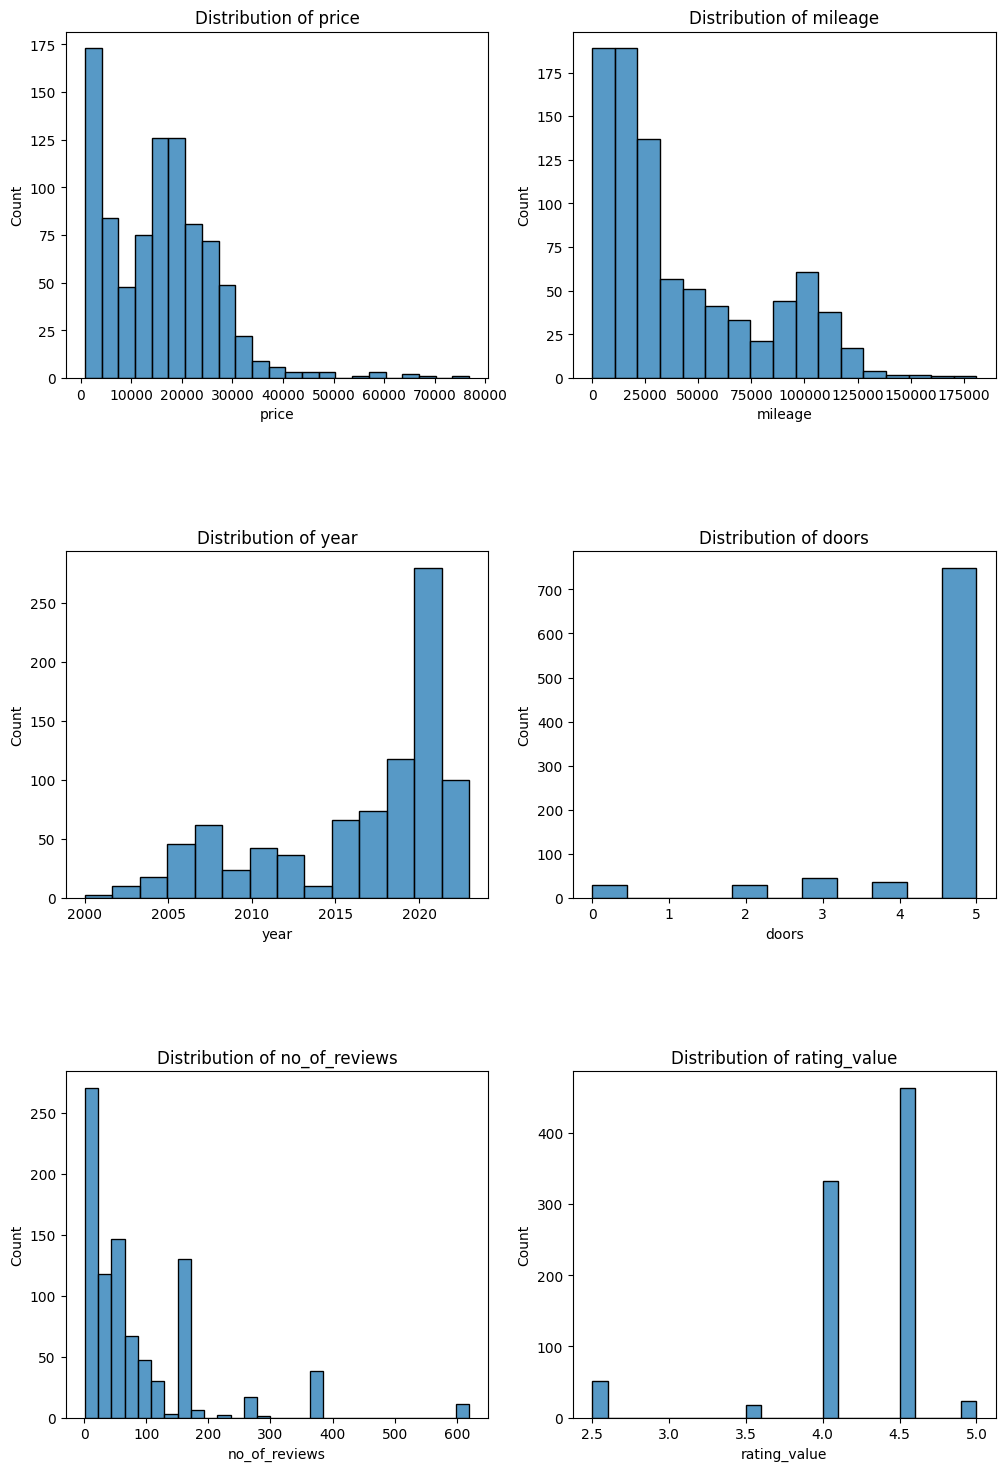

In [7]:
num_cols = new_Df.select_dtypes(include=['float', 'int']).columns
  
num_cols_len = len(num_cols)
num_cols_per_row = 2
num_rows = num_cols_len // num_cols_per_row 

fig, axs = plt.subplots(num_rows, num_cols_per_row, figsize=(12, 6*num_rows))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
axs = axs.ravel()
for i, col in enumerate(num_cols):
  sns.histplot(data=new_Df, x=col, kde=False, ax=axs[i])
  axs[i].set_title(f"Distribution of {col}")
  axs[i].set_xlabel(col)
  axs[i].set_ylabel("Count")
plt.show()

Toyota Yaris 1.5 Hybrid Icon 5dr CVT                  25
Toyota Yaris 1.5 Hybrid Design 5dr CVT                23
Toyota C-HR 1.8 Hybrid Icon 5dr CVT                   11
Toyota Corolla 2.0 VVT-i Hybrid GR Sport 5dr CVT      11
Toyota Yaris 1.5 Hybrid Excel 5dr CVT                 11
                                                      ..
Volkswagen California SE TDI BLUEMOTION TECHNOLOGY     1
SEAT Ibiza 1.4 16v Stylance 5dr                        1
Fiat Bravo 1.6 MultiJet ECO Active 5dr                 1
Fiat Grande Punto 1.4 Active Sport 3dr                 1
Proton Savvy 1.2 Style 5dr                             1
Name: sales_title, Length: 601, dtype: int64


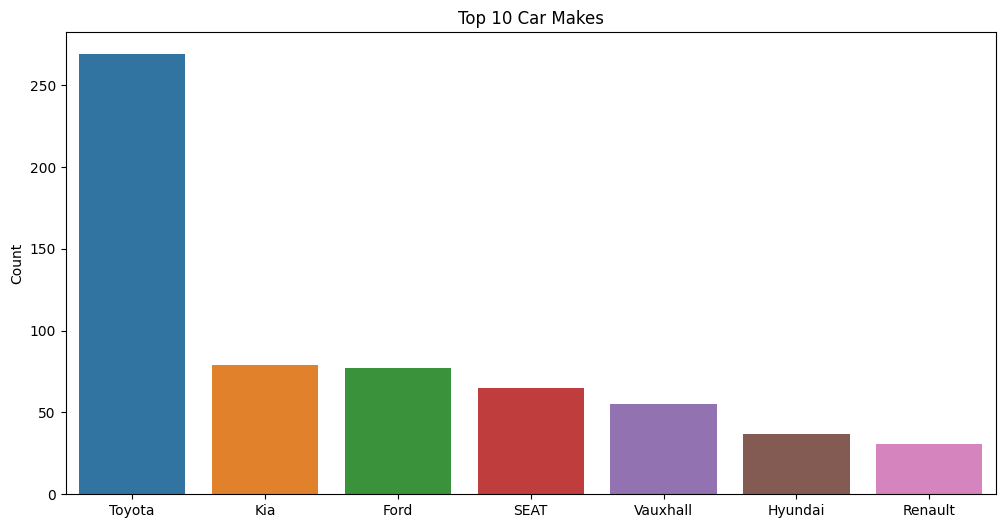

In [8]:
# Assuming your dataframe is called 'df'
popular_sales = new_Df['sales_title'].value_counts()
print(popular_sales)

#get the first string of the sales_title variable as make
new_Df['make'] = new_Df['sales_title'].str.split().str[0]
make_counts = new_Df['make'].value_counts().head(7)

#plot the graph and visualise it
plt.subplots(figsize=(12, 6))
sns.barplot(x=make_counts.index, y=make_counts.values)
plt.title('Top 10 Car Makes')
# plt.xlabel('Car Make')
plt.ylabel('Count')
plt.show()

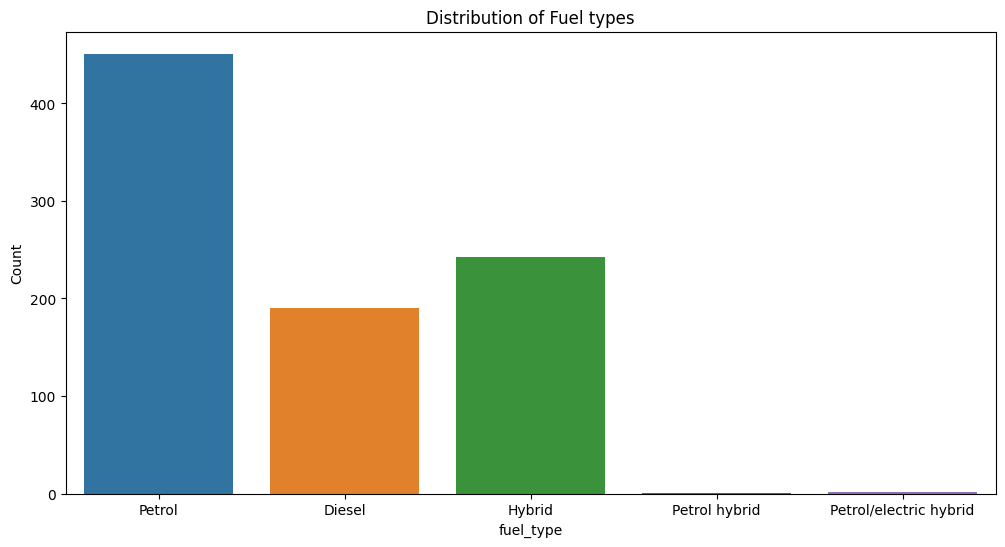

Petrol                    451
Hybrid                    243
Diesel                    190
Petrol/electric hybrid      2
Petrol hybrid               1
Name: fuel_type, dtype: int64




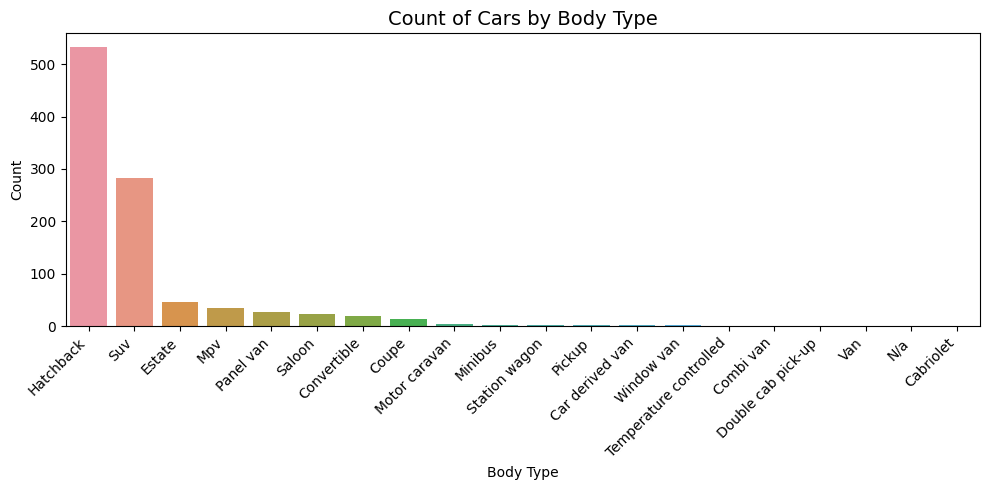

Hatchback                 501
Suv                       219
Estate                     45
Mpv                        32
Panel van                  22
Convertible                19
Saloon                     18
Coupe                      12
Motor caravan               5
Window van                  2
Car derived van             2
Minibus                     2
Station wagon               2
Double cab pick-up          1
Van                         1
Pickup                      1
Combi van                   1
Temperature controlled      1
Cabriolet                   1
Name: body_type, dtype: int64




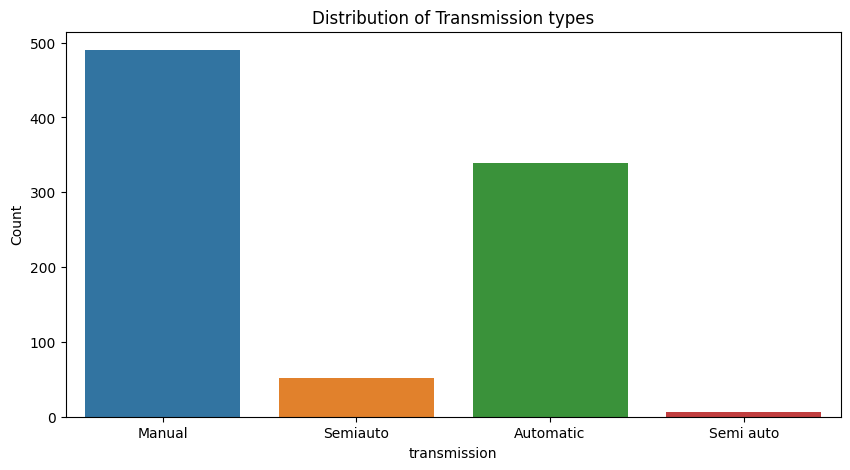

In [9]:
#changing Petrol/electric hybri to Petrol/electric hybrid under the fule type variable
new_Df['fuel_type'] = new_Df['fuel_type'].replace({'Petrol/electric hybr': 'Petrol/electric hybrid', 'N/a': 'Not known'})
new_Df = new_Df.drop(new_Df[new_Df['fuel_type'] == 'Not known'].index)

# A bar plot for Fuel type
fig, axs = plt.subplots(figsize = (12, 6))
sns.countplot(x='fuel_type', data = new_Df)
plt.title('Distribution of Fuel types')
plt.ylabel('Count')
plt.show()

popular_fuel_type = new_Df['fuel_type'].value_counts()
print(popular_fuel_type)

print('\n')

# A bar plot for body type
fig, axs = plt.subplots(figsize = (10, 5))
sns.countplot(x="body_type", data=df, ax=axs, order=df["body_type"].value_counts().index)
axs.set_xlabel("Body Type", fontsize=10)
axs.set_ylabel("Count", fontsize=10)
axs.set_title("Count of Cars by Body Type", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

popular_bodyType = new_Df['body_type'].value_counts()
print(popular_bodyType)

print('\n')

# A bar plot for transmission type
fig, axs = plt.subplots(figsize = (10, 5))
sns.countplot(x='transmission', data = new_Df)
plt.title('Distribution of Transmission types')
plt.ylabel('Count')
plt.show()

## Exploring the distribution and relationship between variables

<ipython-input-10-ad7c7400a9d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = new_Df.corr()


<Axes: >

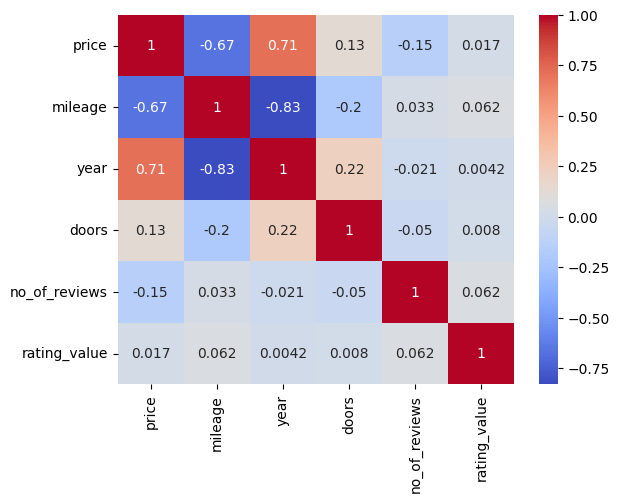

In [10]:
# Correlation matrix heatmap
corr_matrix = new_Df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

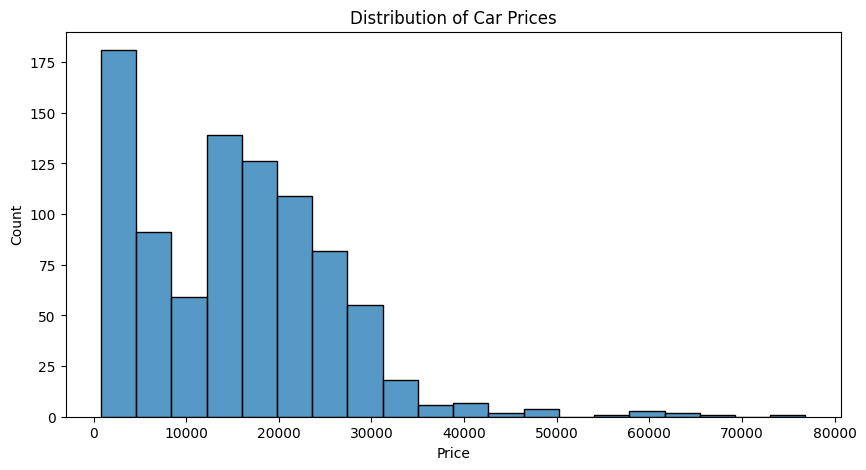

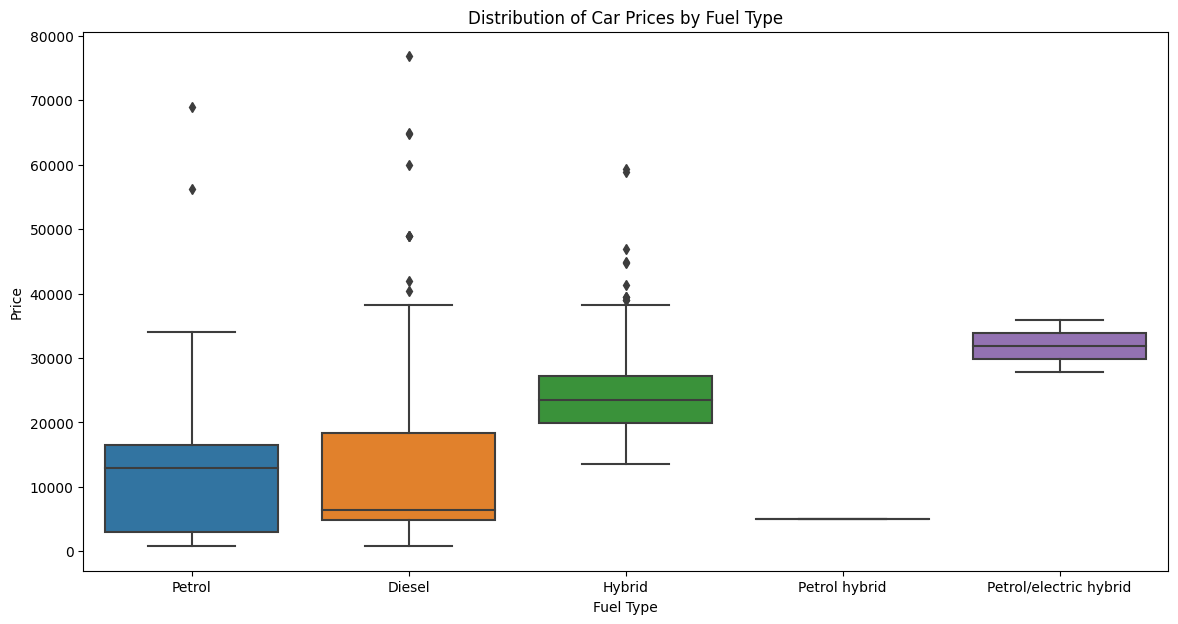

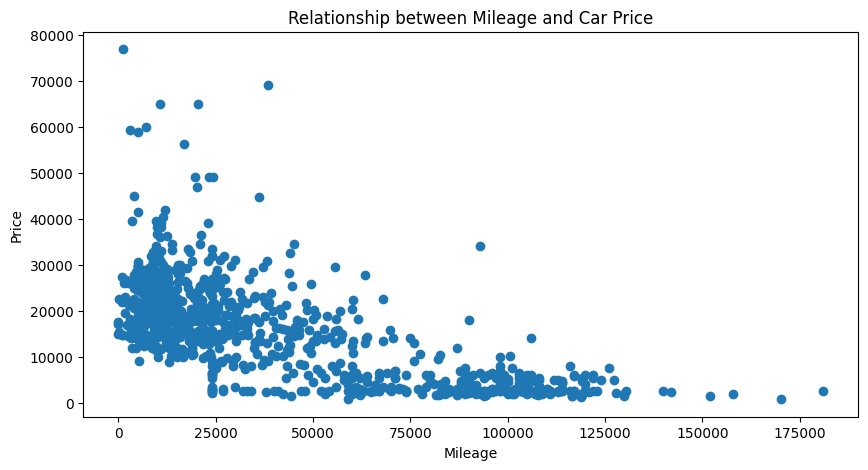

In [11]:
# Histogram of price variable
plt.subplots(figsize=(10, 5))
sns.histplot(new_Df['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Car Prices')
plt.show()

print('\n')

# Box plot of price variable by fuel type
plt.subplots(figsize=(14, 7))
sns.boxplot(x='fuel_type', y='price', data=new_Df)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Distribution of Car Prices by Fuel Type')
plt.show()

print('\n')

# Scatter plot of mileage vs. price
plt.subplots(figsize=(10, 5))
plt.scatter(x='mileage', y='price', data=new_Df)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Relationship between Mileage and Car Price')
plt.show()

## Creating new features

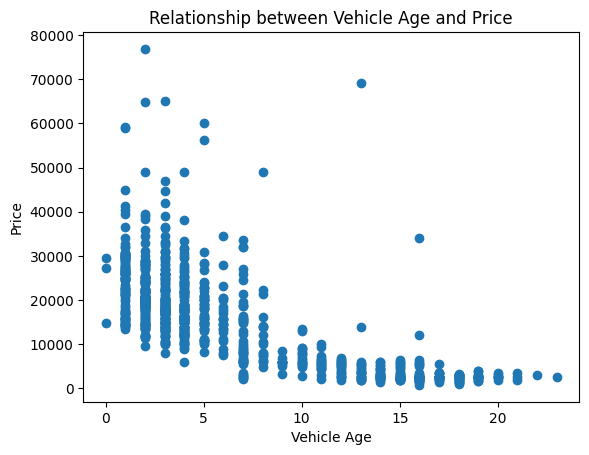

In [12]:
import datetime

#create a new variable vehicle_age
current_year = datetime.datetime.now().year
new_Df['vehicle_age'] = current_year - new_Df['year']

#plot relationship between vehicle_age and price
plt.scatter(new_Df['vehicle_age'], new_Df['price'])
plt.xlabel('Vehicle Age')
plt.ylabel('Price')
plt.title('Relationship between Vehicle Age and Price')
plt.show()

year
2000      1
2001      1
2002      3
2003      7
2004     18
2005     21
2006     25
2007     37
2008     25
2009     24
2010     22
2011     20
2012     18
2013     18
2014     10
2015     18
2016     48
2017     23
2018     51
2019    118
2020    140
2021    139
2022     97
2023      3
Name: sales_title, dtype: int64


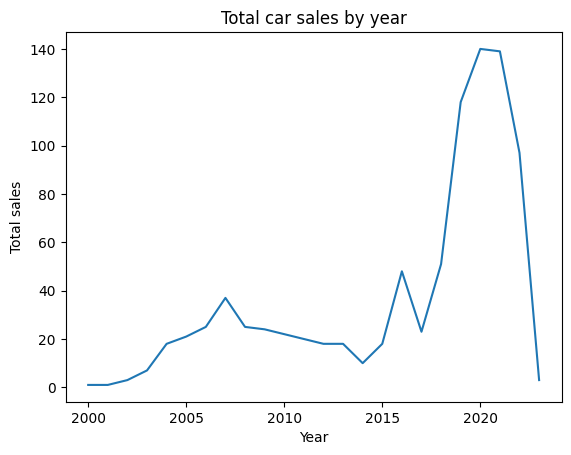

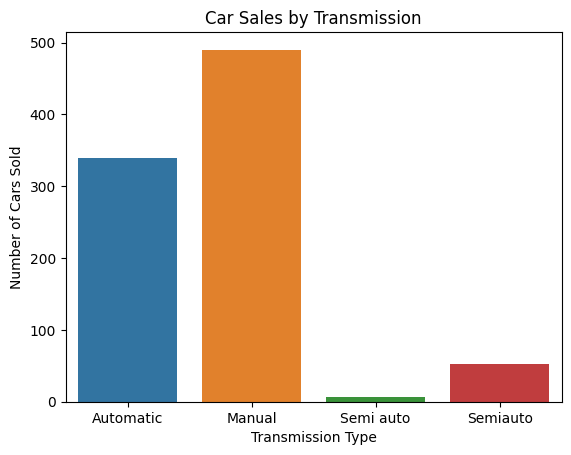

In [13]:
# Group the data by year and calculate the total car sales
total_sales = new_Df.groupby('year')['sales_title'].count()
print(total_sales)

# Plot the total car sales
total_sales.plot(kind='line', x='year', y='sales_title')
plt.title('Total car sales by year')
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.show()

print('\n')

# Group the data by transmission and count the number of cars sold for each type
transmission_counts = new_Df.groupby('transmission')['make'].count().reset_index(name='count')

# Plot a bar chart of the transmission counts
sns.barplot(x='transmission', y='count', data=transmission_counts)
plt.title('Car Sales by Transmission')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars Sold')
plt.show()

The majority of cars in the dataset have a manual transmission, followed by automatic and semi-automatic transmissions.

Furthermore, based on the year feature, the highest number of total car sales was recorded in 2020 with 140 sales, followed by 2021 with 139 sales, and lastly, 2019 with 118 sales.

In [14]:
#get the most popular car body type in the dataset.
popular_body_type = new_Df['body_type'].value_counts()
print(popular_body_type)

Hatchback                 501
Suv                       219
Estate                     45
Mpv                        32
Panel van                  22
Convertible                19
Saloon                     18
Coupe                      12
Motor caravan               5
Window van                  2
Car derived van             2
Minibus                     2
Station wagon               2
Double cab pick-up          1
Van                         1
Pickup                      1
Combi van                   1
Temperature controlled      1
Cabriolet                   1
Name: body_type, dtype: int64


According to the dataset, the Hatchback is the most popular car body type, with 501 cars belonging to this category. Following closely is the SUV with 219 cars, while the Estate takes the third position with 45 cars.

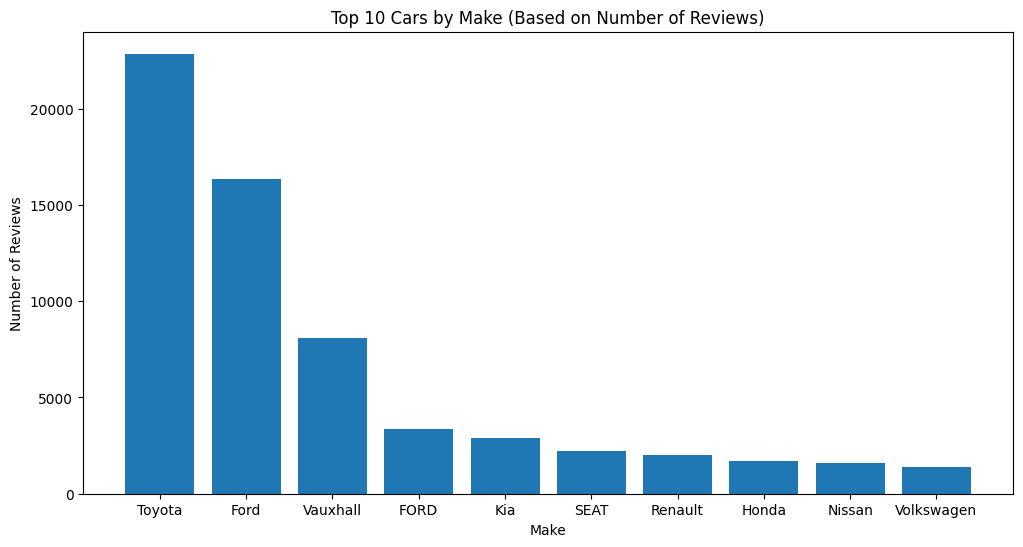

0      6
1      5
2      4
3      3
4      4
      ..
995    2
996    3
997    3
998    2
999    2
Name: vehicle_age, Length: 887, dtype: int64
Oldest Car:
sales_title      Renault Megane 1.6 16v Monaco 2dr
price                                         2490
mileage                                    88000.0
year                                          2000
fuel_type                                   Petrol
transmission                             Automatic
body_type                              Convertible
colour                                      Yellow
doors                                            2
engine_size                                  1.6 L
co2_Emissions                             174 g/km
no_of_reviews                                  119
rating_value                                   4.0
distance                                   9 miles
make                                       Renault
vehicle_age                                     23
Name: 526, dtype: object

Ne

In [17]:
#get the top ten cars with the most number of reviews
top_10_cars = new_Df.groupby('make')['no_of_reviews'].sum().sort_values(ascending=False)[:10]

# Create a bar chart of the top 10 cars by make
plt.subplots(figsize = (12, 6))
plt.bar(top_10_cars.index, top_10_cars.values)
plt.title('Top 10 Cars by Make (Based on Number of Reviews)')
plt.xlabel('Make')
plt.ylabel('Number of Reviews')
plt.show()

print(new_Df['vehicle_age'])

oldest_car = new_Df.loc[new_Df['vehicle_age'].idxmax()]
newest_car = new_Df.loc[new_Df['vehicle_age'].idxmin()]

print("Oldest Car:")
print(oldest_car)

print("\nNewest Car:")
print(newest_car)


From the graph above, we can see that the car that has the most number of reviews is Toyota with Ford coming in second and volkswagen the last in the list.

# Conclusions

Throughout this project, we have explored and analyzed a dataset containing information on car sales. We began by importing the necessary libraries and loading the dataset into a Pandas dataframe.

We then assessed the data for missing values, incorrect data types, and outliers. We addressed the missing values by either dropping the rows or filling them with appropriate values, such as the median for numeric variables or the mode for categorical variables. We also converted certain variables to their appropriate data types, such as converting string variables to integers or floats.

After cleaning the data, we visualized the data using various plotting techniques, such as histograms, bar plots, and box plots. We compared the car sales based on various features such as body type, transmission, and year. We also determined the top 10 cars with the highest number of reviews.

Overall, we found that the majority of the cars in the dataset have a manual transmission, followed by automatic cars and then semi-automatics. The most popular car body type in the dataset is the Hatchback with 501 cars having this body type, followed by SUV with 219 cars and Estate with 45 cars. In addition, we discovered that the majority of total car sales were listed in 2020 with 140 sales, followed by 2021 with 139 sales, and lastly 2019 with 118 sales.

Finally, we drew insights from our analysis and provided recommendations for future actions that can be taken based on the findings.